# Introduction to DCTAP

This document contains a short introduction to DCTAP using [rudof](https://rudof-project.github.io/).


In [2]:
!pip install pyrudof
from pyrudof import Rudof, RudofConfig
rudof = Rudof(RudofConfig())
!pip install ipython # If not already installed
!pip install plantuml
from IPython.display import Image # For displaying images

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.0 MB/s eta 0:00:00


## What is DCTAP?

DCTAP (Dublin Core Tabular Application Profiles) is a model that can be used to define metadata using a tabular format.

In this way, it is possible to define models in CSV which can then be converted to other schema technologies like ShEx or SHACL.

## Converting DCTAP to ShEx

Rudof has support for [DCTAP](https://www.dublincore.org/specifications/dctap/) and can be used to read DCTAP files in CSV or Excel files and convert those models to other schema languages.

DCTAP can be used to represent shapes using a tabular representation using CSV or an spreadsheet format like XLSX. As an example, the following CSV data:


In [3]:
dctap_str = """shapeId,propertyId,Mandatory,Repeatable,valueDatatype,valueShape
Person,name,true,false,xsd:string,
,birthdate,false,false,xsd:date,
,worksFor,false,true,,Company
Company,name,true,false,xsd:string,
,employee,false,true,,Person
"""

In [4]:
rudof.read_dctap_str(dctap_str)

In [5]:
dctap = rudof.get_dctap()

In [6]:
print(dctap)

Shape(Person)  
 name xsd:string 
 birthdate xsd:date ?
 worksFor @Company *
Shape(Company)  
 name xsd:string 
 employee @Person *



It is possible to convert the DCTAP obtained to ShEx

In [7]:
rudof.dctap2shex()


In [8]:
from pyrudof import ShExFormatter, UmlGenerationMode

In [9]:
shex = rudof.get_shex()

result = rudof.serialize_shex(shex, ShExFormatter().without_colors())


In [10]:
print(result)

prefix dct: <http://purl.org/dc/terms/>
prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix owl: <http://www.w3.org/2002/07/owl#>
prefix foaf: <http://xmlns.com/foaf/0.1/>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
prefix sdo: <https://schema.org/>
prefix schema: <http://schema.org/>
prefix ex: <http://example.org/>
prefix base: <http://base/>
ex:Person { ex:name xsd:string; ex:birthdate xsd:date ?; ex:worksFor @ex:Company * }
ex:Company { ex:name xsd:string; ex:employee @ex:Person * }


## Validating data with the ShEx generated from DCTAP

In [11]:
rudof.read_shex_str(result)

In [12]:
rudof.read_data_str("""
prefix : <http://example.org/>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
:alice :name "Alice" ;
       :birthdate "1970-01-01"^^xsd:date ;
       :worksFor :acme .
:acme  :name "ACME INC." .

:bob   :name 23 .
""")

In [13]:
rudof.read_shapemap_str(":alice@ex:Person, :bob@ex:Person")

In [14]:
validation_results = rudof.validate_shex()

In [15]:
print(validation_results.show_as_table())

╭────────┬───────────┬────────╮
│ Node   │ Shape     │ Status │
├────────┼───────────┼────────┤
│ :alice │ ex:Person │ OK     │
├────────┼───────────┼────────┤
│ :bob   │ ex:Person │ FAIL   │
╰────────┴───────────┴────────╯



## Visualizing DCTAP content as a UML diagrams

In [16]:
rudof.shex2plantuml_file(UmlGenerationMode(), 'out.puml')

In [17]:
!python -m plantuml out.puml


[{'filename': 'out.puml', 'gen_success': True}]


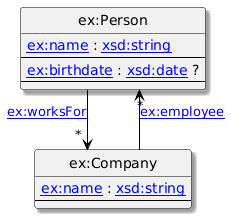

In [18]:
Image("out.png")